In [8]:
import numpy as np
import pandas as pd
import networkx as nx
from pyvis.network import Network
import glob
from pathlib import Path
import os
from datetime import datetime
import itables.interactive
import itables.options as opt
opt.maxBytes = 2**20
DATA_DIR = Path(os.getcwd()).parents[1] / "out"

%matplotlib inline

In [2]:
def get_all_tp_files(working_dir=None):
    if working_dir is None:
        working_dir = DATA_DIR
    
    return Path(working_dir).glob("tp_*")

tp_files = get_all_tp_files()
turnages_generaux = []
for i in range(2010, 2021):
    try:
        turnages_generaux.append(pd.read_csv(DATA_DIR / f"tg_{i}.csv", sep=',', quotechar='|'))
    except Exception as e:
        print(f'Error while reading TG_{i}: {e}')

turnages_partiels = []
for tp in tp_files:
    try:
        _, date = str(tp).split("_")
        date = date[:-len(".csv")]
        dt = pd.to_datetime(date, format="%Y%m%d")
        
        turnages_partiels.append((dt, pd.read_csv(DATA_DIR / tp, sep=',', quotechar='|')))
    except Exception as e:
        print(f'Error while reading {tp}: {e}')

In [3]:
def detect_statut(affect):
    if isinstance(affect, float): # ie nan
        return "inconnu"
    
    if "Élève" in affect:
        return "eleve"
    elif "SI" in affect:
        return "etudiant-si"
    elif "Étudiant" in affect or "Etudiant" in affect or "Auditeurs":
        return "etudiant"
    elif "Mastérien" in affect:
        return "masterien"
    elif "Doctorant" in affect:
        return "doctorant"
    else:
        return affect

In [4]:
for df in (turnages_generaux + turnages_partiels):
    try:
        df["Statut"] = df["Affectations"].map(detect_statut)
    except Exception as e:
        print("DF ignored.")

DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF ignored.
DF i

In [5]:
all_turnages_g = pd.concat(turnages_generaux, keys=map(lambda y: pd.to_datetime(y,
                                                                                format="%Y"),
                                                       range(2010, 2020)), names=['Année', 'ID'])
all_turnages_p = pd.concat([y for _, y in turnages_partiels], keys=[x for x, _ in turnages_partiels])

In [9]:
all_turnages_g[["Classement", "Ancienne thurne", "Nouvelle thurne", "Catégorie", "Statut"]]

,,Classement,Ancienne thurne,Nouvelle thurne,Catégorie,Statut
Année,ID,,,,,


In [10]:
all_turnages_p[["Classement", "Ancienne thurne", "Nouvelle thurne"]]

,,Classement,Ancienne thurne,Nouvelle thurne


## On peut poser la question suivante, sur l'ensemble des turnages généraux, quelles étaient les thurnes les plus populaires ?

In [198]:
all_turnages_g["Nouvelle thurne"].value_counts()[:30]

MB107    10
MC704    10
MB306    10
MC615    10
MB409    10
MC407    10
MB704    10
MC414    10
MB208    10
MB114    10
MC614    10
MB615    10
MB607    10
MB608    10
MC608    10
MB705    10
MB413    10
MB408    10
MC413    10
MB411    10
MC412    10
MB612    10
MB108    10
MB414    10
MB706    10
MC507    10
UC360     9
UC215     9
UC298     9
UC271     9
Name: Nouvelle thurne, dtype: int64

## Puis, quels sont les personnes qui ont été le plus turnés généralement puis partiellement ?

In [199]:
for target in (all_turnages_g, all_turnages_p):
    M = max(target[~pd.isna(target["Nouvelle thurne"])]["Identifiant"].value_counts())
    print(f'Il existe une personne qui a été turné {M} fois')
    # En particulier?
    K = ((target[~pd.isna(target["Nouvelle thurne"])]["Identifiant"].value_counts()) == M).value_counts()[True] # Il y a sûrement plus propre.
    print(f'Il y a eu {K} personnes qui ont été turné {M} fois sur les 20 dernières années')

Il existe une personne qui a été turné 4 fois
Il y a eu 2 personnes qui ont été turné 4 fois sur les 20 dernières années
Il existe une personne qui a été turné 8 fois
Il y a eu 2 personnes qui ont été turné 8 fois sur les 20 dernières années


## En moyenne, combien de temps est logé un normalien ?

In [200]:
all_turnages = pd.concat([all_turnages_g, all_turnages_p]) # Fusion ultime.

# Personnes qui viennent d'acquérir une thurne, soit au TP ou au TG.
acquisitions = all_turnages[~pd.isna(all_turnages["Nouvelle thurne"]) & pd.isna(all_turnages["Ancienne thurne"])] 

anneesParPersonne = acquisitions["Identifiant"].value_counts()

print(f'50 % des normaliens sont logés au moins {anneesParPersonne.median()} ans, hors conscritude.')
print(f'En moyenne: {anneesParPersonne.mean():f} ans.')

50 % des normaliens sont logés au moins 1.0 ans, hors conscritude.
En moyenne: 1.592460 ans.


## Si on prend une session de turnage, regardons le flux des migrations.

In [154]:
def create_flow_graph(turnage_df):
    dg = nx.DiGraph()
    dg.add_nodes_from(turnage_df["Nouvelle thurne"].dropna())
    dg.add_node("Le néant")
    
    tmp_df = turnage_df[["Identifiant", "Ancienne thurne", "Nouvelle thurne"]].fillna("Le néant")
    
    for _, person in tmp_df.iterrows():
        anc_thurne = person["Ancienne thurne"]
        nouv_thurne = person["Nouvelle thurne"]
        
        dg.add_edge(anc_thurne, nouv_thurne, label=person["Identifiant"])
        
    return dg

dg = create_flow_graph(turnages_generaux[-1])
g = Network(height=800, width=920, notebook=True, heading="Flux migratoires au sein d'un turnage")
g.toggle_hide_edges_on_drag(True)
g.barnes_hut()
g.from_nx(dg)
g.show("ex.html")

## Malheureusement, ce graphe précédent n'est pas très intéressant. 

On aimerait savoir où vont les normaliens au fur et à mesure.
Pour cela, il faut « tracker » les normaliens. Les TGs ne disposent pas de l'information de thurne précédente.

In [ ]:
def create_history_graph(all_df):
    dg = nx.DiGraph()
    
    dg.add_nodes_from(all_df['Nouvelle thurne'].dropna())
    dg.add_nodes_from([f"Le néant année {year}" for year in all_df["Année"]])
    
    tmp_df = all_df.copy()
    for year in all years:
        tmp_df[year] = all_df[year][["Identifiant", "Ancienne thurne", "Nouvelle thurne"]]
        .fillna(f"Le néant année {year}")
        for identifiant 
        tmp_df[year + 1]["Ancienne thurne"] = tmp_df[year]["Nouvelle thurne"]
    
    
    

In [324]:
tmp = all_turnages.copy().sort_index()

def series_to_tuple(s):
    return zip(s, s.index)

def produce_aligned_previous_turnes(future, past):
    # Magic incoming.
    # Ce que l'on veut, sur un passé donnée, on veut établir le mapping identifiant → nouvelle thurne le plus vieux.
    # Notez qu'un passé peut contenir au plus un turnage général ainsi que M turnages partiels quelconques.
    # Il faut donc veiller à prendre le turnage le plus vieux concernant la personne.
    # Pour cela, on va reset l'index en année, on va pivoter sur Identifiant.
    # Puis, ensuite, on groupera par index, tout en gardant la nouvelle thurne, puis on prend la date max.
    # Enfin, nous connaissons la date de turnage final, donc on connait la turne finale.
    df_pivot = past[["Identifiant", "Nouvelle thurne"]].reset_index(level=0, inplace=False).set_index("Identifiant")
    date_de_turnage_finaux = df_pivot.groupby([df_pivot.index, "Nouvelle thurne"])["Année"].max()
    df_target = df.reset_index().set_index(["Année", "Identifiant"])
    # Voici, donc identifiant → nouvelle thurne sur une année donnée.
    mapping = target.loc[list(series_to_tuple(date_de_turnage_finaux))].reset_index(level=0)["Nouvelle thurne"]
    # On combine avec le futur, en préférant les choix du futur.
    final_mapping = future.reset_index().set_index("Identifiant")["Ancienne thurne"].combine_first(mapping)
    # À présent, on peut mettre à jour le futur.
    return final_mapping
    
    
df = tmp.loc["2011"][["Identifiant", "Nouvelle thurne"]].reset_index(level=0, inplace=False).set_index("Identifiant")
date_de_turnage_finaux = df.groupby([df.index])["Année"].max()
target = df.reset_index().set_index(["Année", "Identifiant"])
mapping = target.loc[list(zip(date_de_turnage_finaux, date_de_turnage_finaux.index))].reset_index(level=0)["Nouvelle thurne"]
final = mapping.combine_first(tmp.loc["2012-01-01"].reset_index().set_index("Identifiant")["Ancienne thurne"])
tmp.loc["2012-01-01"]["Identifiant"]

Année       ID 
2012-01-01  0        lebiez
            1        villez
            2        verron
            3      abenhamo
            4      scarpent
                     ...   
            365     gouraud
            366      aparis
            367     maligot
            368    sfrances
            369          ha
Name: Identifiant, Length: 370, dtype: object

# Évolution du nombre de thurnes mises en jeu aux TGs au cours des années

<AxesSubplot:xlabel='Année'>

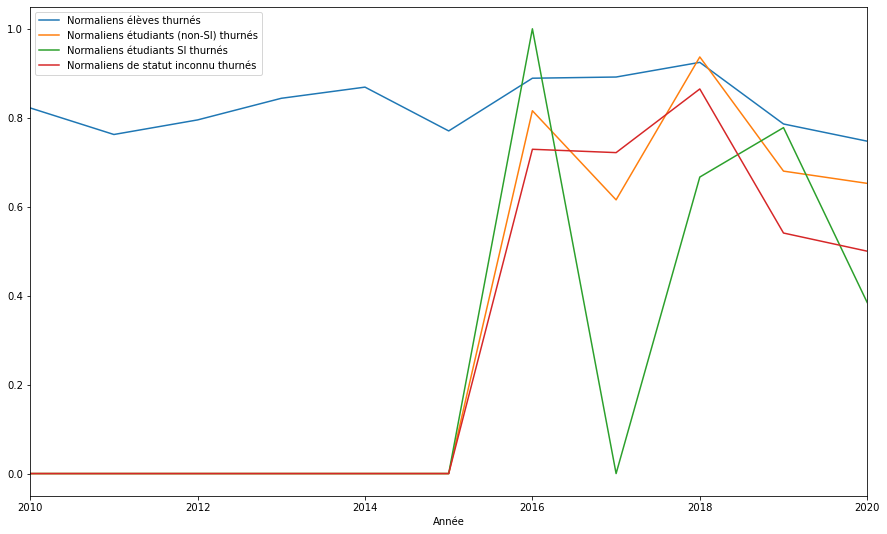

In [476]:
def kpi(i, turnage):
    total = len(turnage)
    nvturne = turnage["Nouvelle thurne"]
    
    assignes = nvturne.notnull().sum()
    non_assignes = total - assignes
    
    if i >= 6: # Introduction des étudiants.
        total_eleves = len(turnage[turnage["Statut"] == "eleve"])
        total_etudiants = len(turnage[turnage["Statut"] == "etudiant"])
        total_etudiants_si = len(turnage[turnage["Statut"] == "etudiant-si"])
        total_etudiants_inconnus = len(turnage[turnage["Statut"] == "inconnu"])
        
        eleves_assignes = turnage[turnage["Statut"] == "eleve"]["Nouvelle thurne"].notnull().sum() / total_eleves
        etudiants_assignes = turnage[turnage["Statut"] == "etudiant"]["Nouvelle thurne"].notnull().sum() / total_etudiants if total_etudiants > 0 else 0
        etudiants_si_assignes = turnage[turnage["Statut"] == "etudiant-si"]["Nouvelle thurne"].notnull().sum() / total_etudiants_si if total_etudiants_si > 0 else 0
        etudiants_inconnus_assignes = turnage[turnage["Statut"] == "inconnu"]["Nouvelle thurne"].notnull().sum() / total_etudiants_inconnus if total_etudiants_inconnus > 0 else 0
    else:
        eleves_assignes = assignes / total
        etudiants_assignes = 0
        etudiants_si_assignes = 0
        etudiants_inconnus_assignes = 0
    
    return (i + 2010,
#           total,
#           assignes,
#           non_assignes,
            eleves_assignes,
            etudiants_assignes,
               etudiants_si_assignes,
           etudiants_inconnus_assignes)
    

evolution_parc = pd.DataFrame([
    kpi(i, turnages_generaux[i]) for i in range(len(turnages_generaux))],
            columns=[
                "Année",
           #     "Normaliens en tout", 
           #     "Nombre de thurnes assignés",
           #     "Normaliens sans thurnes",
            "Normaliens élèves thurnés",
            "Normaliens étudiants (non-SI) thurnés",
            "Normaliens étudiants SI thurnés",
            "Normaliens de statut inconnu thurnés"]).set_index("Année")

evolution_parc.plot(figsize=(15,9))

<AxesSubplot:>

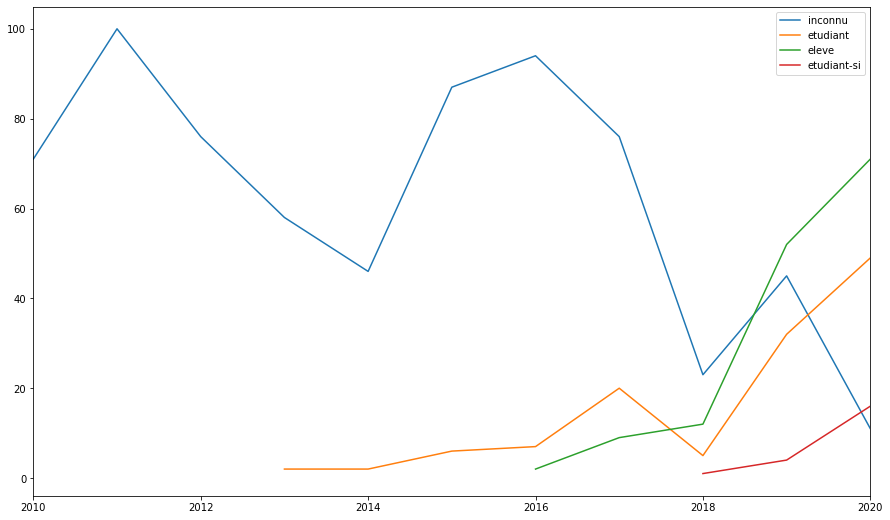

In [469]:
pd.DataFrame([df[df["Nouvelle thurne"].isna()]["Statut"].value_counts() for i, df in enumerate(turnages_generaux)],
            index=[i for i in range(2010, 2021)]).plot(figsize=(15, 9))


Voici ce qui est prédit pour les deux années suivantes.

<AxesSubplot:xlabel='Année'>

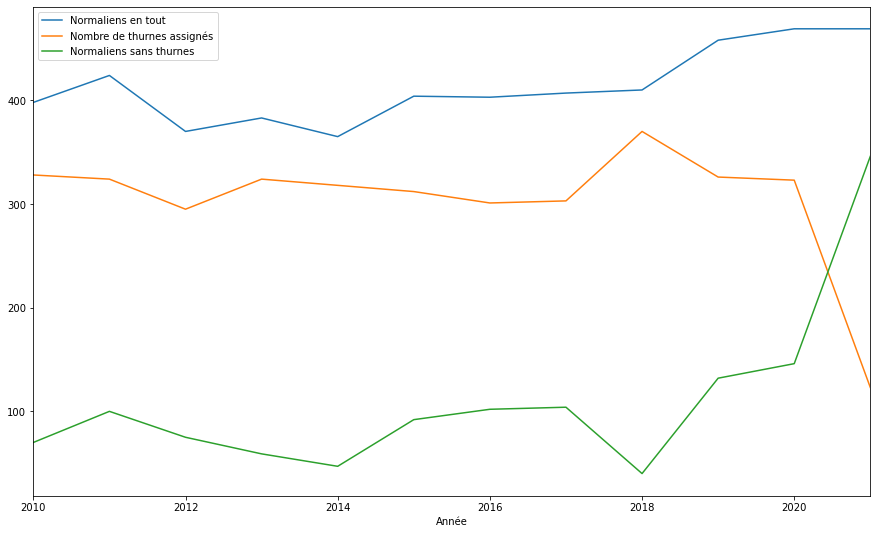

In [386]:
H1 = 144
H2 = 200
predictions_parc = pd.DataFrame([
    (2021,
     evolution_parc.iloc[-1]["Normaliens en tout"], evolution_parc.iloc[-1]["Nombre de thurnes assignés"] - H2,
     evolution_parc.iloc[-1]["Normaliens sans thurnes"] + H2), # Hypothèse du document UDG (optimiste ou non optimiste).
], columns=["Année", "Normaliens en tout", "Nombre de thurnes assignés", "Normaliens sans thurnes"]).set_index("Année")
pd.concat([evolution_parc, predictions_parc]).plot(figsize=(15,9))



In [16]:
def parse_end_jokers(cat):
    if cat.endswith('J'):
        return 1
    elif cat.endswith('bJ'):
        return 2
    elif cat.endswith('tJ'):
        return 3
    else:
        return 0
def translate_pt(v):
    if v == "P": return "paire"
    elif v == "T": return "trio"
    else: raise ValueError(f"Unknown mode: {v}")
def categorie_parser(cat):
    if pd.isna(cat):
        return None
    if cat[1] == 'J' or cat[2] == 'J': # Modèle récent du type XJ.YAL
        j, _ = cat.split('J')
        j = int(j) # Handle >9J.
        _, al_or_pt = cat.split('.')
        result = { 'jokers': j, 'cst': False, 'paire': False, 'trio': False}
        if al_or_pt in ('T', 'P'):
            result[translate_pt(al_or_pt)] = True
        else:
            v, _ = al_or_pt.split("AL")
            result["al"] = int(v)
        return result
    elif cat[0] == 'A': # Systèmes de catégories: A.
        if cat[2] == 'C': # CST
            j = parse_end_jokers(cat)
            return { 'jokers': j, 'cst': True, 'al': None }
        else:
            annee = int(cat[2]) # Année de scolarité
            j = parse_end_jokers(cat)
            
            return { 'jokers': j, 'annee': annee, 'cst': False, 'al': None }
    elif cat[0] == 'B': # Système de catégories: B.
        _, subcat = cat.split('-')
        al, annee = subcat.split('.')
        al = int(al)
        if annee == 'CST':
            return { 'jokers': 1, 'cst': True, 'al': al }
        else:
            return { 'jokers': 1, 'cst': False, 'al': al, 'annee': int(annee) }
    elif cat[0] == 'C': # Système de catégories: C.
        _, subcat = cat.split('-')
        if subcat == 'SI':
            return { 'jokers': 0, 'si': True, 'al': None }
        else:
            al, annee = subcat.split('.')
            al = int(al)
            if annee == 'CST':
                return { 'jokers': 0, 'cst': True, 'al': al }
            else:
                return { 'jokers': 0, 'al': al, 'annee': int(annee) }
    else:
        raise ValueError(f"Cannot parse the value: {cat} yet")

def path_parser(elt, default=np.nan):
    def inner(cat):
        v = categorie_parser(cat)
        if not v:
            return default
        return v.get(elt, default)
    return inner

parsers = {
    "Jokers joués": path_parser("jokers"),
    "al": path_parser("al"),
    "annee_etude": path_parser("annee"),
    "paire": path_parser("paire", False),
    "trio": path_parser("trio", False),
    "cst": path_parser("cst", False)
}

def enrich_df(df):
    new_df = df.copy()
    for column, parser in parsers.items():
        new_df[column] = df["Catégorie"].map(parser)
    
    return new_df

new_df = enrich_df(turnages_generaux[-1])
new_df[['Classement', 'Identifiant', 'Catégorie', 'Nouvelle thurne', 'Jokers joués', 'Statut', 'al', 'paire', 'trio']]

Classement,Identifiant,Catégorie,Nouvelle thurne,Jokers joués,Statut,al,paire,trio
